# **Enterprise Endgame Evaluator**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.metrics import f1_score, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df= pd.read_csv('data.csv')
print("Information about the Dataset:\n")
df.info()


Information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null  

In [3]:
df.dropna()
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
count= 0
notScaled= []
for column in df.columns:
    if max(df[column])>1:
        print("Not Scaled Feature: ", column)
        count += 1
        notScaled.append(column)

print('Number columns not scaled:',len(notScaled))


Not Scaled Feature:   Operating Expense Rate
Not Scaled Feature:   Research and development expense rate
Not Scaled Feature:   Interest-bearing debt interest rate
Not Scaled Feature:   Revenue Per Share (Yuan ¥)
Not Scaled Feature:   Total Asset Growth Rate
Not Scaled Feature:   Net Value Growth Rate
Not Scaled Feature:   Current Ratio
Not Scaled Feature:   Quick Ratio
Not Scaled Feature:   Total debt/Total net worth
Not Scaled Feature:   Accounts Receivable Turnover
Not Scaled Feature:   Average Collection Days
Not Scaled Feature:   Inventory Turnover Rate (times)
Not Scaled Feature:   Fixed Assets Turnover Frequency
Not Scaled Feature:   Revenue per person
Not Scaled Feature:   Allocation rate per person
Not Scaled Feature:   Quick Assets/Current Liability
Not Scaled Feature:   Cash/Current Liability
Not Scaled Feature:   Inventory/Current Liability
Not Scaled Feature:   Long-term Liability to Current Assets
Not Scaled Feature:   Current Asset Turnover Rate
Not Scaled Feature:   Quic

# **Scaling**

In [5]:
scaler = StandardScaler()
df[notScaled] = scaler.fit_transform(df[notScaled])

**Corelation between varibles**

In [6]:
featureCorr= abs(df.corr())
featureCorr.style.background_gradient(cmap='coolwarm')

c:\Users\TheRealJoker\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\TheRealJoker\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


**Feature Graphs Relationship**

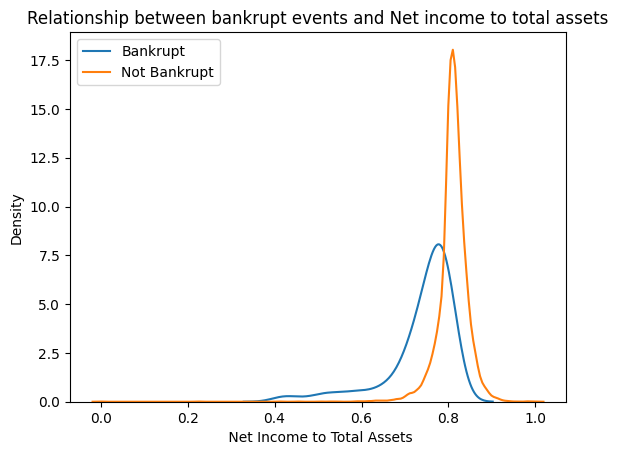

In [7]:
plt.figure()
sns.kdeplot(df[df['Bankrupt?']==1][' Net Income to Total Assets'])
sns.kdeplot(df[df['Bankrupt?']==0][' Net Income to Total Assets'])

plt.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Net income to total assets')
plt.show()

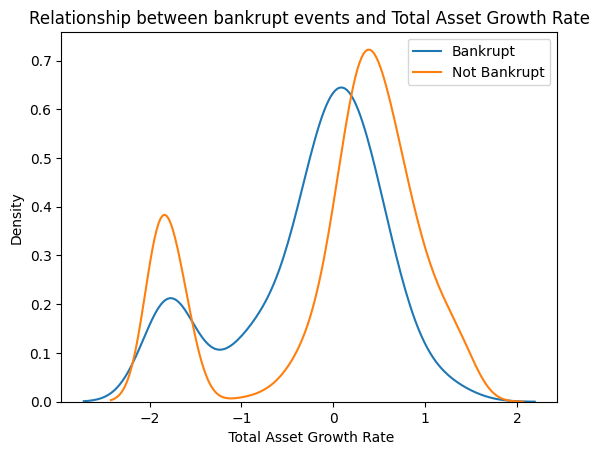

In [8]:
plt.figure()
sns.kdeplot(df[df['Bankrupt?']==1][' Total Asset Growth Rate'])
sns.kdeplot(df[df['Bankrupt?']==0][' Total Asset Growth Rate'])

plt.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Total Asset Growth Rate')
plt.show()

In [9]:
df.shape


(6819, 96)

**Target Feature**

Text(0.5, 1.0, 'Target feature: Bankrupt?')

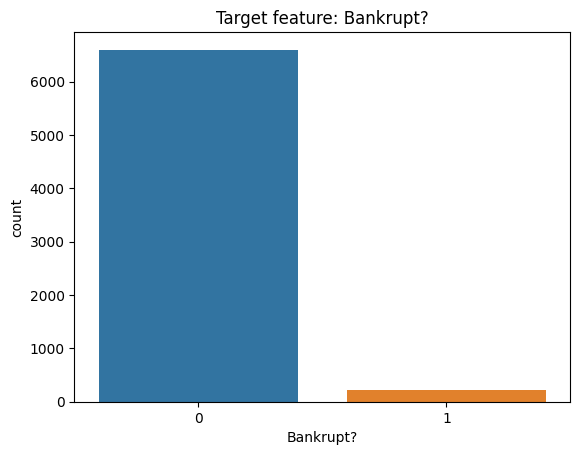

In [10]:
df['Bankrupt?'].value_counts()
sns.countplot(x=df['Bankrupt?'])
plt.title('Target feature: Bankrupt?')



**SMOTE**

Shape of X before SMOTE:(6819, 95)
Shape of X after SMOTE:(13198, 95) 


Target Class distributuion before SMOTE:
0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: Bankrupt?, dtype: float64


Text(0.5, 1.0, 'Target feature: Bankrupt?')

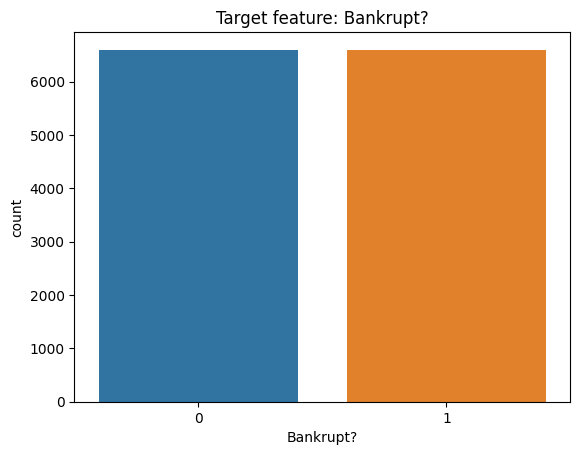

In [11]:
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']


dataSmote = SMOTE(random_state=50)
X_sm, y_sm = dataSmote.fit_resample(X,y)
print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')
sns.countplot(x=y_sm)
plt.title('Target feature: Bankrupt?')


# **Feature Selection**

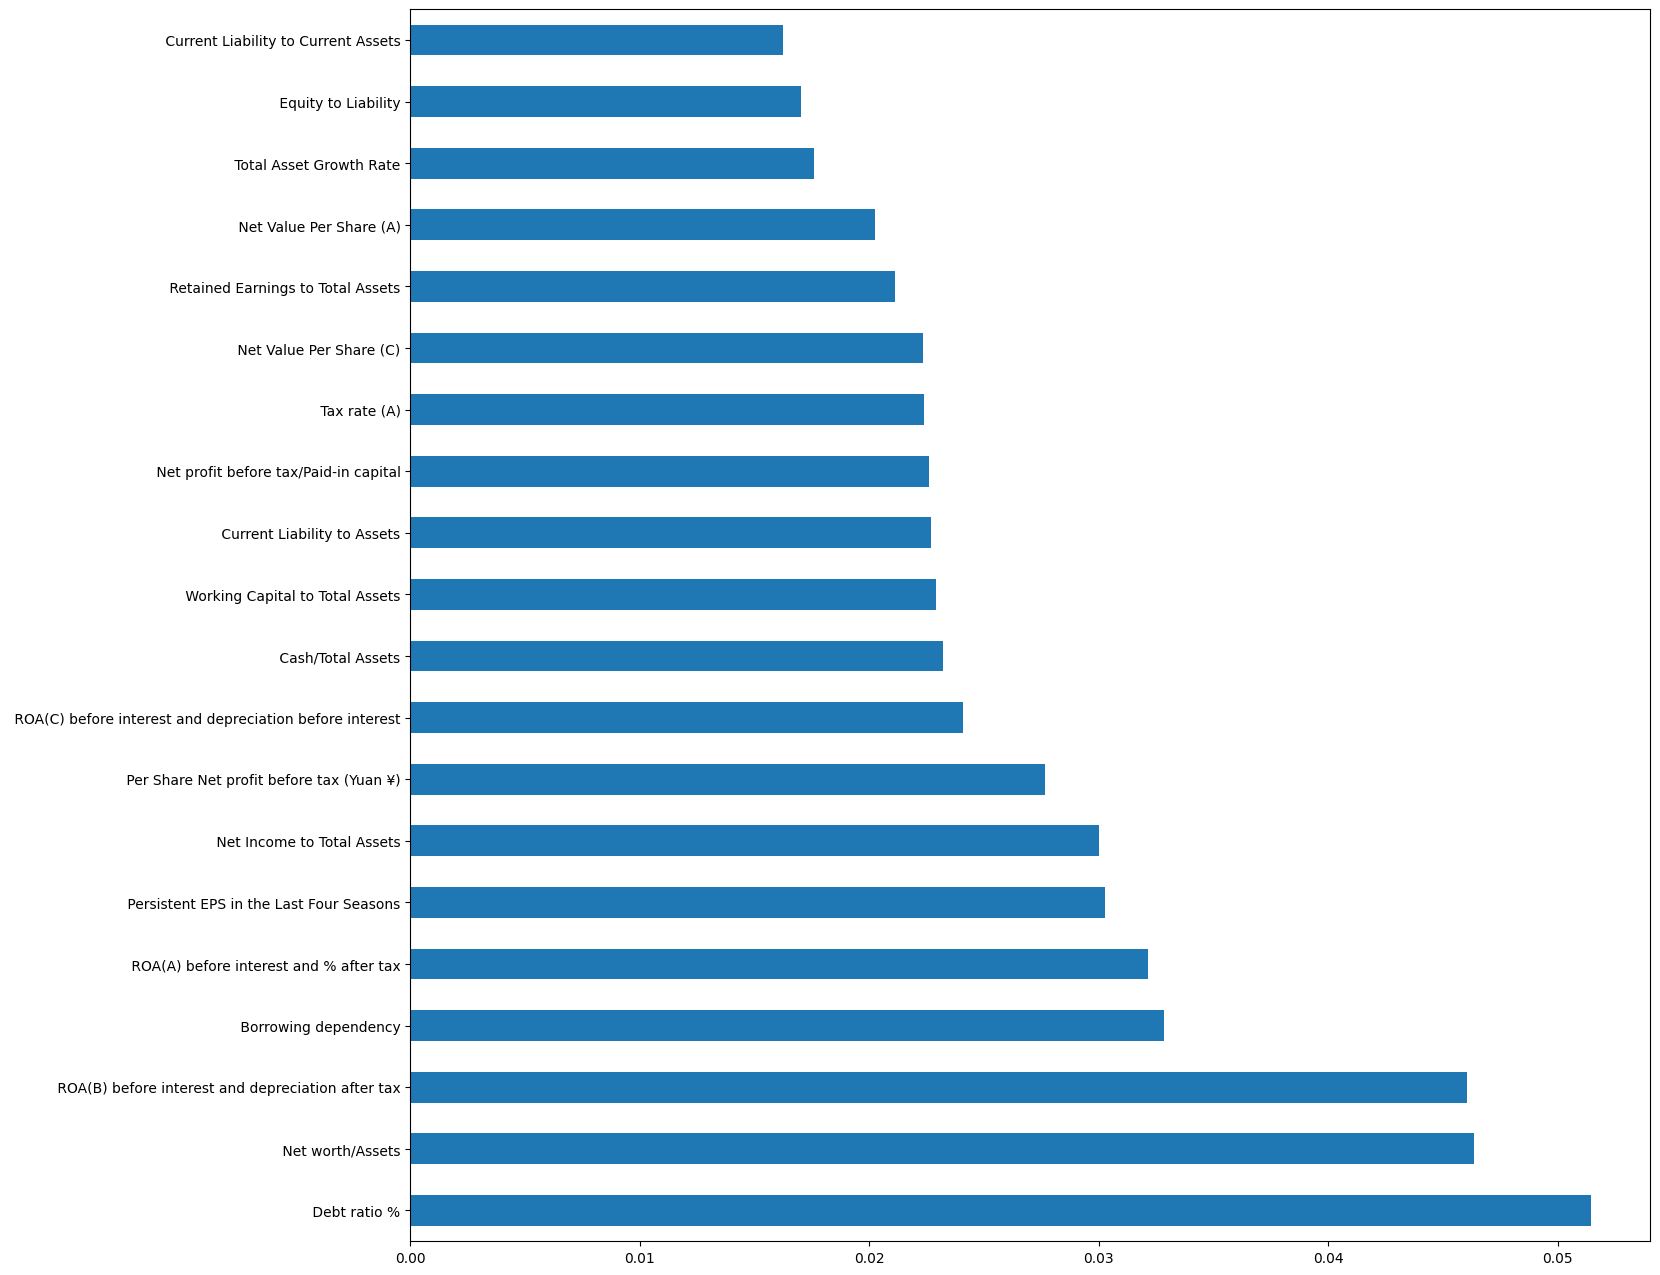

In [12]:
model = ExtraTreesClassifier()
plt.figure(figsize=(16, 16))
model.fit(X_sm,y_sm)
# print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

In [13]:

selectedFeatures= SelectKBest(mutual_info_classif, k=20).fit(X_sm, y_sm)
featureColumns =X_sm.columns[selectedFeatures.get_support()]
X_SelectedFeatures = X_sm[featureColumns]

print(X_SelectedFeatures.shape)
X_SelectedFeatures



X_train, X_test, y_train, y_test= train_test_split(X_SelectedFeatures, y_sm,test_size=0.2, stratify=y_sm) 


(13198, 20)


**Correlation map of best features**

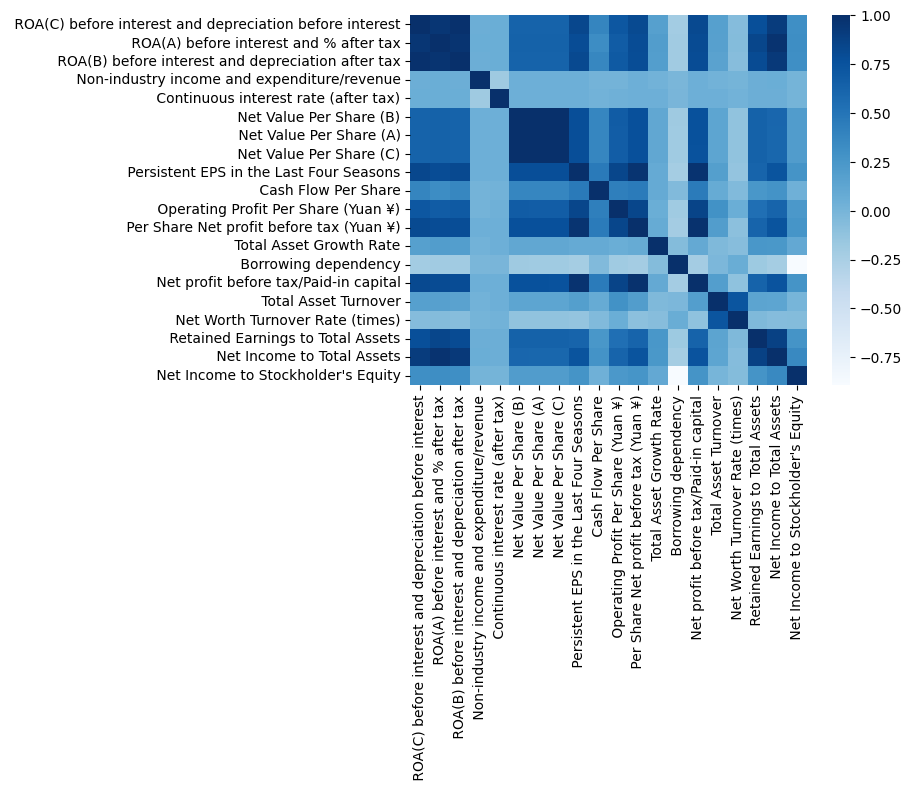

In [14]:
plt.figure()
sns.heatmap(X_SelectedFeatures.corr(), cmap = "Blues")
plt.show()

In [15]:
X_SelectedFeatures2=X_SelectedFeatures
X_SelectedFeatures2.insert(0,'Bankrupt?','')
X_SelectedFeatures2['Bankrupt?'] = y_sm

featureCorr= abs(X_SelectedFeatures2.corr())
featureCorr.style.background_gradient(cmap='coolwarm')

C:\Users\TheRealJoker\AppData\Local\Temp\ipykernel_35388\2962743504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_SelectedFeatures2['Bankrupt?'] = y_sm


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Total Asset Growth Rate,Borrowing dependency,Net profit before tax/Paid-in capital,Total Asset Turnover,Net Worth Turnover Rate (times),Retained Earnings to Total Assets,Net Income to Total Assets,Net Income to Stockholder's Equity
Bankrupt?,1.000000,0.573593,0.552729,0.566727,0.048633,0.026530,0.500316,0.499808,0.497547,0.569839,0.261643,0.438451,0.545450,0.124548,0.203914,0.552522,0.224067,0.039190,0.487686,0.537986,0.171869
ROA(C) before interest and depreciation before interest,0.573593,1.000000,0.951192,0.988845,0.050555,0.060131,0.630284,0.628645,0.627851,0.832335,0.386401,0.715816,0.813170,0.179439,0.210591,0.817381,0.174624,0.066762,0.773374,0.904677,0.309471
ROA(A) before interest and % after tax,0.552729,0.951192,1.000000,0.968447,0.056604,0.056979,0.636248,0.634779,0.634525,0.798440,0.327297,0.679256,0.797548,0.201643,0.198322,0.803984,0.166342,0.059803,0.839542,0.972851,0.313487
ROA(B) before interest and depreciation after tax,0.566727,0.988845,0.968447,1.000000,0.050514,0.059238,0.626395,0.624827,0.624178,0.818797,0.365456,0.690283,0.788375,0.187892,0.201987,0.793351,0.155455,0.073766,0.804817,0.931578,0.309858
Non-industry income and expenditure/revenue,0.048633,0.050555,0.056604,0.050514,1.000000,0.188093,0.045970,0.046062,0.045905,0.043318,0.012218,0.017611,0.046561,0.018040,0.012659,0.047198,0.018515,0.006720,0.051520,0.055491,0.009700
Continuous interest rate (after tax),0.026530,0.060131,0.056979,0.059238,0.188093,1.000000,0.044448,0.044564,0.044497,0.040779,0.021856,0.036568,0.040582,0.043278,0.005794,0.040308,0.045180,0.025071,0.049800,0.049757,0.008874
Net Value Per Share (B),0.500316,0.630284,0.636248,0.626395,0.045970,0.044448,1.000000,0.999251,0.998827,0.783332,0.375904,0.676050,0.770267,0.108273,0.187037,0.758126,0.132410,0.118318,0.631730,0.601780,0.203807
Net Value Per Share (A),0.499808,0.628645,0.634779,0.624827,0.046062,0.044564,0.999251,1.000000,0.999581,0.782745,0.375223,0.674884,0.769476,0.107527,0.190000,0.756656,0.133771,0.117071,0.631295,0.600319,0.203378
Net Value Per Share (C),0.497547,0.627851,0.634525,0.624178,0.045905,0.044497,0.998827,0.999581,1.000000,0.781524,0.374250,0.674317,0.768350,0.109027,0.189941,0.755633,0.132119,0.117926,0.630857,0.600252,0.203566
Persistent EPS in the Last Four Seasons,0.569839,0.832335,0.798440,0.818797,0.043318,0.040779,0.783332,0.782745,0.781524,1.000000,0.464193,0.842588,0.968313,0.085170,0.220673,0.971534,0.182964,0.132090,0.623367,0.741384,0.271627


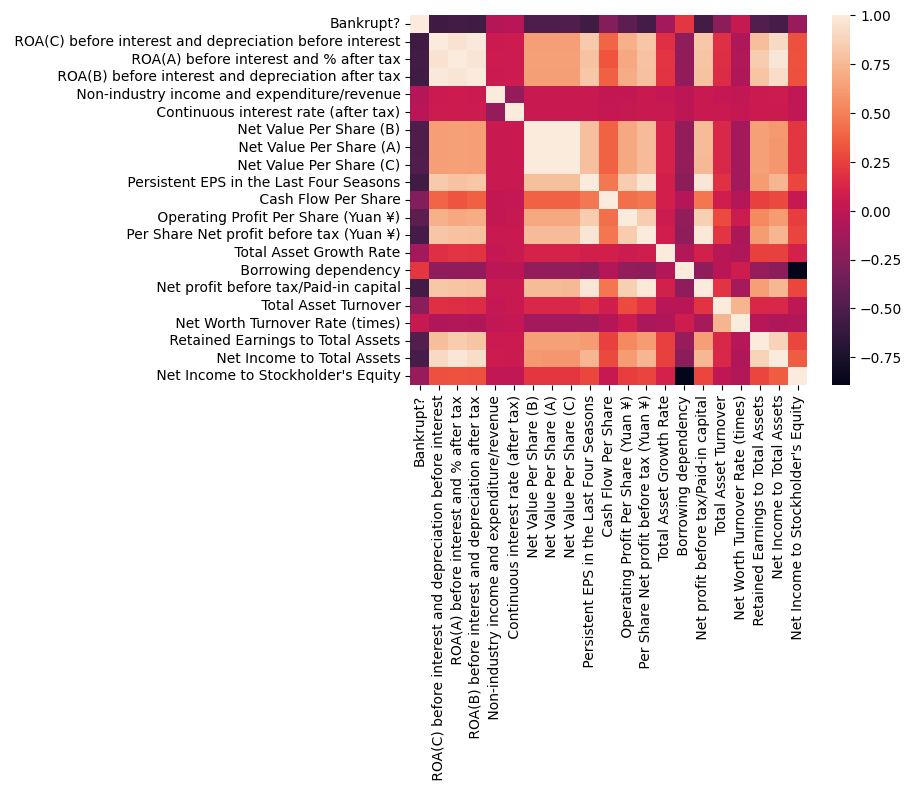

In [16]:
g=sns.heatmap(X_SelectedFeatures2.corr())

# **Models**

SVC, RandomForestClassifier, AdaBoost, LogisticRegression, KNN Classifier Algorithm, 


In [17]:
models = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'parameters' : {
            'C': [1,5,10,20],
            'kernel': ['rbf','linear','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'parameters' : {
            'n_estimators': [1,5,10,20,30,50],
            'criterion':['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'parameters': {
            'C': [1,5,10],
            'solver':['lbfgs','liblinear']
        }
    },
   'KNN': {
        'model':KNeighborsClassifier(),
        'parameters':{
            'n_neighbors' : [1,3,5,7],
            'algorithm':['auto','kd_tree']
        }
    },
    'AdaBoost': {
        'model':AdaBoostClassifier(),
        'parameters':{
            'n_estimators': [1,2,3,5,10,20,30,50],
            'learning_rate' : [1,3,5,7],
        }
    }
}

In [18]:
scores= []

for modelType, m in models.items():
    clf =  GridSearchCV(m['model'], m['parameters'], cv=7, verbose=3, n_jobs=-1, return_train_score=False)
    clf.fit(X_SelectedFeatures, y_sm)
    scores.append({
        'model': modelType,
        'best_score': clf.best_score_,
        'best_parameters': clf.best_params_
    })
    
best = pd.DataFrame(scores,columns=['model','best_score','best_parameters'])
best

Fitting 7 folds for each of 12 candidates, totalling 84 fits
Fitting 7 folds for each of 12 candidates, totalling 84 fits
Fitting 7 folds for each of 6 candidates, totalling 42 fits
Fitting 7 folds for each of 8 candidates, totalling 56 fits
Fitting 7 folds for each of 32 candidates, totalling 224 fits


,model,best_score,best_parameters
0,svm,1.0,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,1.0,"{'criterion': 'gini', 'n_estimators': 20}"
2,logistic_regression,1.0,"{'C': 1, 'solver': 'lbfgs'}"
3,KNN,1.0,"{'algorithm': 'auto', 'n_neighbors': 1}"
4,AdaBoost,1.0,"{'learning_rate': 1, 'n_estimators': 1}"


In [19]:
modelName, accuracy, Recall, Precision, f1= [],[],[],[],[]

**The above table gives the best parameters for the model**

**SVC**

Accuracy is: 88.4469696969697
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1320
           1       0.87      0.91      0.89      1320

    accuracy                           0.88      2640
   macro avg       0.89      0.88      0.88      2640
weighted avg       0.89      0.88      0.88      2640



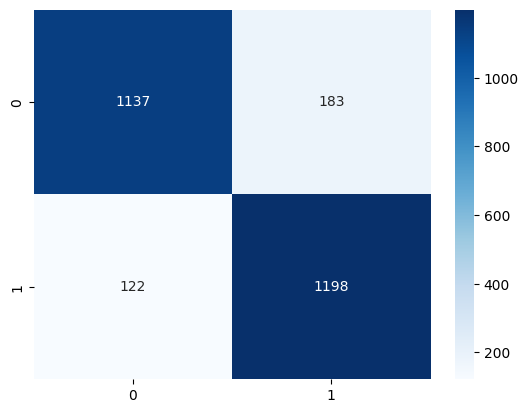

In [20]:
svc=SVC(gamma='auto',C=100.0,probability=True, kernel='rbf' ) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

accuracyScore= accuracy_score(y_test, y_pred)
print("Accuracy is:" ,accuracyScore*100)
print(classification_report(y_test, y_pred))
heatMap= sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap='Blues',fmt = 'd')

modelName.append('SVC')
accuracy.append(accuracyScore)
f1.append(f1_score(y_test, y_pred))
Recall.append(recall_score(y_test, y_pred))
Precision.append(precision_score(y_test, y_pred))

**RandomForestClassifier**

Accuracy is: 96.28787878787878
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1320
           1       0.95      0.98      0.96      1320

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



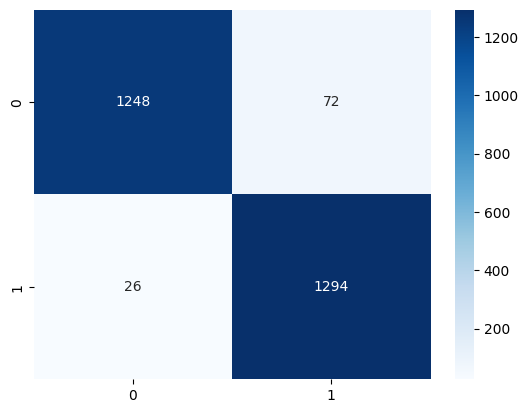

In [21]:
randomForest = RandomForestClassifier(n_estimators=100, random_state = 777)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)

accuracyScore= accuracy_score(y_test, y_pred)
print("Accuracy is:" ,accuracyScore*100)
print(classification_report(y_test, y_pred))
heatMap = sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap='Blues',fmt = 'd')


modelName.append('RandomForestClassifier')
accuracy.append(accuracyScore)
f1.append(f1_score(y_test, y_pred))
Recall.append(recall_score(y_test, y_pred))
Precision.append(precision_score(y_test, y_pred))

**KNN Classifier Algorithm**

Accuracy is: 90.9090909090909
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1242
           1       0.92      0.90      0.91      1398

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



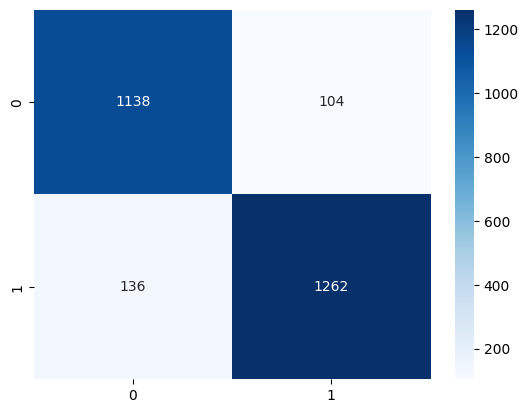

In [22]:
knn = KNeighborsClassifier(n_neighbors=4, algorithm='auto')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

accuracyScore= accuracy_score(knn_pred, y_pred)
print("Accuracy is:" ,accuracyScore*100)
print(classification_report(knn_pred, y_pred))
heatMap = sns.heatmap(confusion_matrix(knn_pred,y_pred), annot = True, cmap='Blues',fmt = 'd')

modelName.append('KNeighborsClassifier')
accuracy.append(accuracyScore)
f1.append(f1_score(knn_pred, y_pred))
Recall.append(recall_score(knn_pred, y_pred))
Precision.append(precision_score(knn_pred, y_pred))

**LogisticRegression**

Accuracy is: 87.5
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1320
           1       0.86      0.89      0.88      1320

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.87      2640
weighted avg       0.88      0.88      0.87      2640



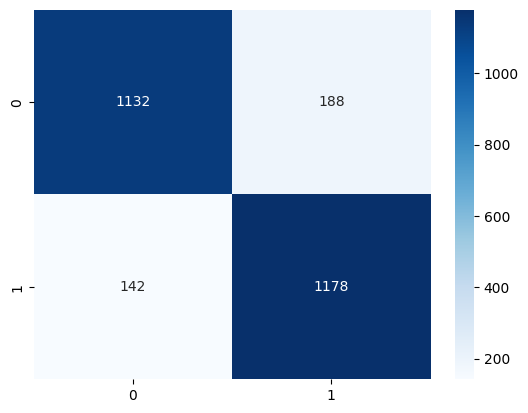

In [23]:
logModel= LogisticRegression(solver='liblinear',multi_class='auto', C = 5)
logModel.fit(X_train,y_train)
log_predictions = logModel.predict(X_test)

accuracyScore= accuracy_score(log_predictions, y_pred)
print("Accuracy is:" ,accuracyScore*100)
print(classification_report(log_predictions, y_pred))
heatMap = sns.heatmap(confusion_matrix(log_predictions,y_pred), annot = True, cmap='Blues',fmt = 'd')


modelName.append('LogisticRegression')
accuracy.append(accuracyScore)
f1.append(f1_score(log_predictions, y_pred))
Recall.append(recall_score(log_predictions, y_pred))
Precision.append(precision_score(log_predictions, y_pred))

**AdaBoostClassifier**

Accuracy is: 93.75
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1279
           1       0.94      0.94      0.94      1361

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640



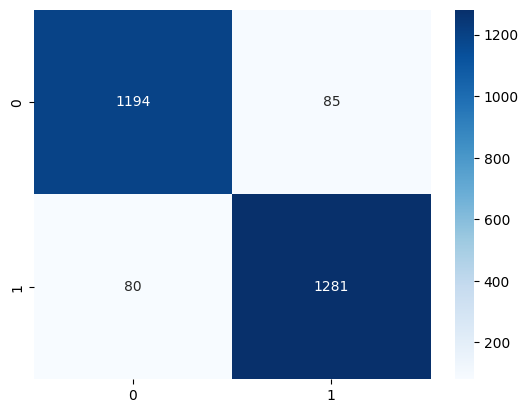

In [24]:
adaBoost = AdaBoostClassifier(n_estimators = 50,learning_rate = 1, random_state =50)
adaBoost.fit(X_train, y_train)
y_pred_abc = adaBoost.predict(X_test)

accuracyScore= accuracy_score(y_pred_abc, y_pred)
print("Accuracy is:" ,accuracyScore*100)
print(classification_report(y_pred_abc, y_pred))
heatMap= sns.heatmap(confusion_matrix(y_pred_abc,y_pred), annot = True, cmap='Blues',fmt = 'd')


modelName.append('AdaBoostClassifier')
accuracy.append(accuracyScore)
f1.append(f1_score(y_pred_abc, y_pred))
Recall.append(recall_score(y_pred_abc, y_pred))
Precision.append(precision_score(y_pred_abc, y_pred))

# **ROC Curves**

**ROC, SVC**

In [25]:
y_predSVC = svc.predict_proba(X_test)[:,1]
svcFpr, svcTpr, threshold = roc_curve(y_test, y_predSVC)
accuracySVC = auc(svcFpr, svcTpr)

**ROC Logistic**

In [26]:
y_predLogistic= logModel.predict_proba(X_test)[:,1]
logisticFpr, logisticTpr, threshold= roc_curve(y_test, y_predLogistic)
accuracyLogistic= auc(logisticFpr, logisticTpr)

**ROC RandomForrest**

In [27]:
y_predRandomForest= randomForest.predict_proba(X_test)[:,1]
randomForestFpr, randomForestTpr, threshold= roc_curve(y_test, y_predRandomForest)
accuracyRandomForest= auc(randomForestFpr, randomForestTpr)

**ROC, KNN**

In [28]:
y_predKnn = knn.predict_proba(X_test)[:,1]
knnFpr, knnTpr, threshold = roc_curve(y_test, y_predKnn)
accuracyKnn = auc(knnFpr, knnTpr)

**ROC, AdaBoost**

In [29]:
y_predAdaBoost = adaBoost.predict_proba(X_test)[:,1]
AdaBoostFpr, AdaBoostTpr, threshold = roc_curve(y_test, y_predAdaBoost)
accuracyAdaBoost = auc(AdaBoostFpr, AdaBoostTpr)

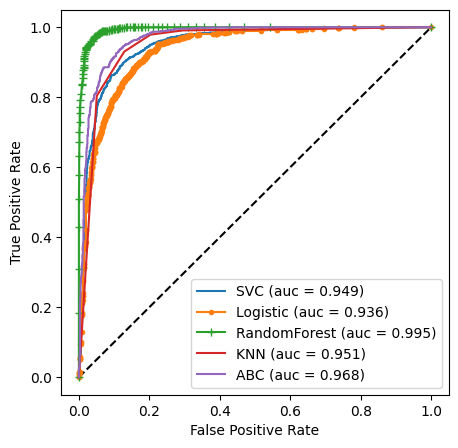

In [30]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(svcFpr, svcTpr, linestyle='-', label='SVC (auc = %0.3f)' % accuracySVC)
plt.plot(logisticFpr, logisticTpr, marker='.', label='Logistic (auc = %0.3f)' % accuracyLogistic)
plt.plot(randomForestFpr, randomForestTpr, marker='+', label='RandomForest (auc = %0.3f)' % accuracyRandomForest)
plt.plot(knnFpr, knnTpr, linestyle='-', label='KNN (auc = %0.3f)' % accuracyKnn)
plt.plot(AdaBoostFpr, AdaBoostTpr, linestyle='-', label='ABC (auc = %0.3f)' % accuracyAdaBoost)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')

# **Comparing Models**

In [31]:
df2= pd.DataFrame({'Models': modelName, 'Accuracy': accuracy, 'F1-Measure': f1,'Recall': Recall,'Precision':Precision})
df2

,Models,Accuracy,F1-Measure,Recall,Precision
0,SVC,0.884470,0.887079,0.907576,0.867487
1,RandomForestClassifier,0.962879,0.963515,0.980303,0.947291
2,KNeighborsClassifier,0.909091,0.913169,0.902718,0.923865
3,LogisticRegression,0.875000,0.877141,0.892424,0.862372
4,AdaBoostClassifier,0.937500,0.939494,0.941220,0.937775


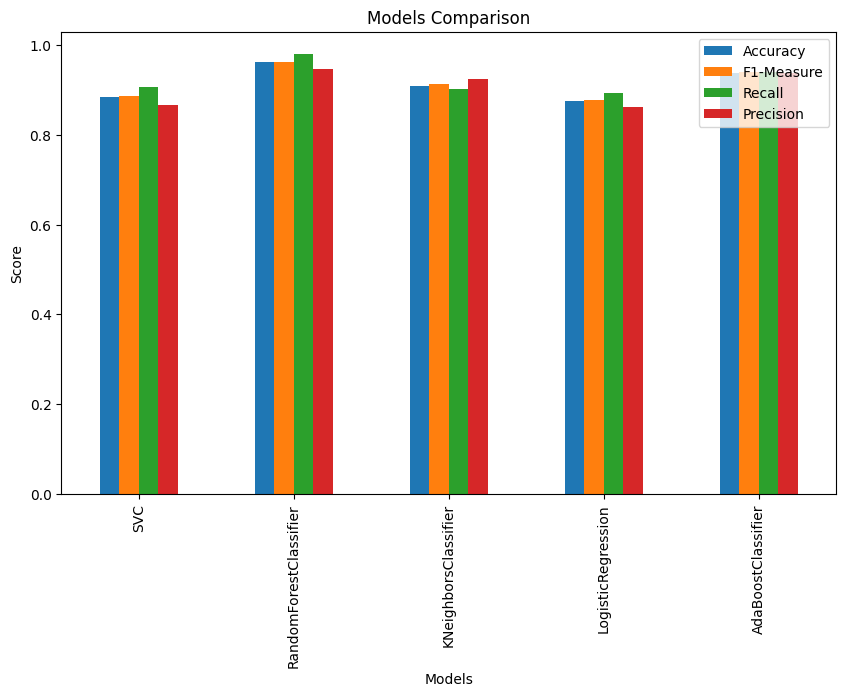

In [32]:
df2.set_index('Models', inplace=True)
plot= df2.plot(kind='bar', figsize=(10,6))

plot.set_title('Models Comparison')
plot.set_xlabel('Models')
plot.set_ylabel('Score')
plt.show()